In [ ]:
#!pip install nltk

## EDA ON GULF TWEETS

In [1]:
import nltk

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
pd.options.display.max_colwidth = 75

In [4]:
pwd

'/home/jovyan/capstone-35/eda'

In [6]:
cd ../../capstone-35/gulf_twitter_pickled

/home/jovyan/capstone-35/gulf_twitter_pickled


In [7]:
ls

stream_الطريج.p               user_timeline_Hasan95780025.p
stream_تميلح.p                user_timeline_iMothaSm.p
stream_ثقيل.p                 user_timeline_majed9064.p
user_timeline_A_sh066.p       user_timeline_Nora_buhamad.p
user_timeline_BatoolALQ_.p    user_timeline_vvllm.p
user_timeline_DeviantFatma.p  user_timeline_white_pearla.p


### Instantiate cleaned pickles

In [8]:
df_batch_1 = pd.read_pickle('../gulf_twitter_pickled/stream_ثقيل.p')

### Identify most frequent `locations` and `names`

In [9]:
df_batch_1.cleaned_geo.value_counts().head()

None            394
Saudi Arabia     80
Kuwait           25
                 17
Egypt             7
Name: cleaned_geo, dtype: int64

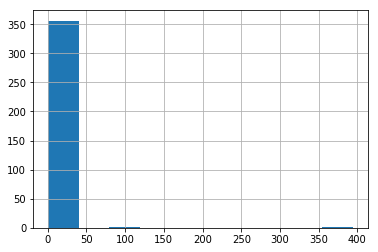

In [10]:
df_batch_1.cleaned_geo.value_counts().hist()

In [11]:
df_batch_1.cleaned_name.value_counts().head()

raedyassin3    5
ksa_jop        2
K21OOF         2
Arrraaz        2
AlissaNawaf    2
Name: cleaned_name, dtype: int64

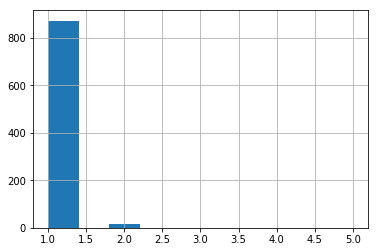

In [12]:
df_batch_1.cleaned_name.value_counts().hist()

In [13]:
df_batch_1.cleaned_geo.unique()

array(['None', 'نصفي دُفن مع أبي.', 'Manchester, Kuwait',
       'جدة, مكة المكرمة', 'دولة الكويت 🇰🇼', 'يارب انك ترحم أمي️',
       'Saudi Arabia', 'Kuwait', 'القطيف', 'saudi arabia,Qatar',
       'Dammam, Saudi Arabia', '', 'دبي, الامارات العربية المتحدة',
       'مكتفيه قروبات', 'Kurdistan of Iraq - Erbil', 'Bayan, Kuwait',
       'كل الوطن العربي', 'أرض الله', 'تحت أقدام أمي',
       'الخبر, المملكة العربية السعودية', 'oh-man', 'your heart.',
       'الحناكية, المدينة المنورة', 'خيال الظل', 'Not Sorry for anything',
       'اي فتحة ادخل فيها زبي', 'نوال الكويتيه️', 'Bahrain',
       'الامارات العربية المتحدة', 'Dhahran Eastern | Doha', 'الدوحه',
       '\u200fاللهم صلي وسلم على نبينا محمد', 'بين الغيوم.', 'الطائف',
       'أرض الأحلام⭐️', 'Redwood City, CA', 'مدونتي-أبها',
       'أدعوك لزيارة قائمه الإعجاب', 'twice.straykids', 'طرابلس',
       'Mishrif , kuwait', 'Egypt', 'شتات', 'Nowhere.', '.', 'عرعر',
       'حائل _المملكة العربية السعودية', 'صمتي شموخي', 'الحـجاز', 'riyadh',
  

In [14]:
df_batch_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 14 to 6126
Data columns (total 3 columns):
cleaned_text    912 non-null object
cleaned_name    912 non-null object
cleaned_geo     912 non-null object
dtypes: object(3)
memory usage: 28.5+ KB


In [15]:
df_batch_1.cleaned_name.nunique()

891

__Finding users with highest lexical diversity scores to add them to timelines search__

In [16]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [17]:
#creating cleaned text score in a new column
df_batch_1['cleaned_text_score'] = df_batch_1['cleaned_text'].map(lambda x: lexical_diversity(x))

In [18]:
#creating length of cleaned text in a new column to remove short tweets w/high lexical diversity score
df_batch_1['cleaned_text_len'] = df_batch_1['cleaned_text'].map(lambda x: len(x))

In [19]:
#creating mask of tweets w/ lexical diversity scores over 0.4
df_highest_user_scores = df_batch_1.loc[df_batch_1['cleaned_text_score'] >= 0.4, ['cleaned_name','cleaned_text_score', 'cleaned_text', 'cleaned_text_len']]

In [26]:
#adding mask to exclude tweets under 40 characters
df_highest_user_scores[(df_highest_user_scores['cleaned_text_score'] >= 0.40) 
                         & (df_highest_user_scores['cleaned_text_len'] >= 40)]

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
241,nadaaltunji,0.413043,للحروف وزن ثقيل قد لا نعرفه إلا بعد طلق سراحها,46
302,alkandri_,0.444444,ي صـاحبي خلك ثقيل لا يهزك عـابر، ولآ يغرك حكي,45
475,fatmaalsh50,0.434783,لابسه ثقيل على أساس الجو صقيع و بالاخر ميته حر,46
483,xiii2_ll,0.436364,اللهم عُونك اذا باتْ كل شي ثقيل اللهّم نفس مُطمئنه وجنه,55
498,Shatha__ma,0.428571,اي والله فيه و من عيار ثقيل كمان لإختبار الهيئة 🤓,49
566,fhth2020,0.425926,أعترف همّي على صدري ثقيل لو لا رب الكـــون كيف أتحملّه,54
679,ilreem148,0.431034,شعور إنّك ثقيل على أحد سيّء لدرجة يخلّيك تكره الحياة كلّها,58
682,_avv,0.411765,لعل ركعة واحدة تكون نهاية حزن ثقيل وبداية فرح مقيم️,51
772,Sam82x_,0.560976,اللهُم عونك إن بات كل شيء ثقيل علَى صَدري,41
1066,_nahl,0.422222,ٓ ٓ ٓ ٓ ٓ ٓ لمحت الود بعيُوني ولكنك ثقيل شعور,45


In [21]:
df_highest_user_scores.sort_values('cleaned_text_score', ascending=False).head()

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
325,Alajmi7E7,1.0,امين,4
154,KahledRashdi,1.0,دمك ثقيل,8
4241,isa_althawadi96,1.0,انت ثقيل,8
3280,weej_188,1.0,من جد,5
2947,adnan_R10,1.0,فعلاً,5


### Conduct EDA on tweets

In [22]:
word_list = [word for line in df_batch_1['cleaned_text'] for word in line.split()]

In [23]:
word_list[:5]

['تياقو', 'نيفيز', 'قال', 'اول', 'انا']

In [ ]:
word_list.count('مغسلة')

In [ ]:
len(word_list)

In [ ]:
vocab = set(word_list)
vocab_size = len(vocab)
vocab_size

In [ ]:
from nltk.text import Text  

In [ ]:
text_eda = Text(word_list)

In [ ]:
def percentage(count, total):
    return 100 * count / total

In [ ]:
percentage(text_eda.count('مغسلة'), len(text_eda))

In [ ]:
text_eda.concordance("مغسلة")

In [ ]:
from nltk import FreqDist

In [ ]:
fdist1 = FreqDist(text_eda)

In [ ]:
vocabulary1 = list(fdist1.keys())
vocabulary1[:10]

In [ ]:
fdist1.plot(50, cumulative=True)

In [ ]:
text_eda.dispersion_plot([u"مغسلة", "ياخذون", "فقط", "داخل", "عايز"])

In [ ]:
text_eda.similar("مغسلة")

In [ ]:
sorted([w for w in set(word_list) if len(w) > 2 and fdist1[w] > 10])

In [ ]:
word_length = [len(w) for w in text_eda]

In [ ]:
word_length[:10]

In [ ]:
fdist = FreqDist([len(w) for w in text_eda])

In [ ]:
print(fdist)

In [ ]:
fdist.items()

In [ ]:
fdist.max()

In [ ]:
fdist.freq(2)